In [6]:
import filecmp
import os
import random
from typing import List
import subprocess


def run_pyfile(path, timeout=None, env=None, *args):
    env2 = os.environ.copy()
    if env:
        env2.update(env)
    # 强制子进程按 UTF-8 写 stdout/stderr
    env2.setdefault('PYTHONIOENCODING', 'utf-8')
    env2.setdefault('PYTHONUTF8', '1')

    cp = subprocess.run(
        [sys.executable, path, *map(str, args)],
        capture_output=True,
        text=True,  # 文本模式
        encoding='utf-8',  # ★ 关键：指定编码
        errors='replace',  # ★ 关键：容错
        env=env2,
        timeout=timeout,
    )

    ok = (cp.returncode == 0)
    if not ok:
        raise RuntimeError(
            f"Command failed (returncode={cp.returncode}).\n"
            f"--- stdout ---\n{cp.stdout}\n"
            f"--- stderr ---\n{cp.stderr}"
        )
    return {"ok": ok, "returncode": cp.returncode, "stdout": cp.stdout, "stderr": cp.stderr}


def get_bfmd_files_os(folder_path: str) -> List[str]:
    """使用os.walk获取所有.bfmd文件路径,仅文件名"""
    bfmd_filenames = []
    for _, _, files in os.walk(folder_path):
        bfmd_filenames.extend([f for f in files if f.endswith('.bfmd')])
    return bfmd_filenames


def check_file(folder_path: str, type_str: str = ".py"):
    """核查两个文件是否相同"""
    bfmd_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.bfmd'):
                file_path = os.path.join(root, file)
                bfmd_files.append(file_path)
    for item in bfmd_files:
        name1 = item.replace("桥通模型文件", "桥通模型临时文件").replace(".bfmd", type_str)
        if os.path.exists(name1):
            name2 = "2-" + name1.replace(type_str, type_str)
            if os.path.exists(name2):
                if not filecmp.cmp(name1, name2, shallow=False):
                    print(name1)
                else:
                    os.remove(name1)
                    os.remove(name2)


def fix_py_files(folder_path, qtmodel_path, url):
    """
    更改指定目录下的所有 .py 文件：
    1. 修改第二行 import，使其能找到 qtmodel
    2. 在第二行和第三行之间插入 mdb.set_url(...)
    """
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".py"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()
            # 1. 第二行前添加sys
            if lines and lines[1].strip() == "from qtmodel import *":
                lines[1] = f"import sys\nsys.path.append(r\"{qtmodel_path}\")\nfrom qtmodel import *\n"
            # 2. 插入 mdb.set_url
            if len(lines) >= 2:
                if f'mdb.set_url("{url}")\n' not in lines:
                    lines.insert(2, f'mdb.set_url("{url}")\n')
            else:
                lines.append(f'mdb.set_url("{url}")\n')

            with open(file_path, 'w', encoding='utf-8') as f:
                f.writelines(lines)

In [7]:
# 更改测试文件路径
input_path = r"D:/模型/桥通模型文件"
output_path = r"C:\Users\Robert\Desktop\MyWork\桥通模型临时文件"
url = "http://10.33.176.44:61076/"
module_path = r'E:\pyqt'

In [8]:
# -*- coding: utf-8 -*-
import time
import sys

sys.path.append(module_path)  # 使用正斜杠
from qtmodel import mdb

mdb.set_url(url)

# 先导入全部文件
file_names = ['1-江阴第三通道方案-静力准确模型.bfmd', '1488m斜拉悬吊.bfmd', '184-205多遇线性时程桥通模型.bfmd', '2x75连续刚构.bfmd', '40m简支.bfmd',
              '532m斜拉桥反应谱.bfmd', '55m钢箱梁-梁格模型.bfmd', '72+120+72-建模.bfmd', 'Midas模型.bfmd', 'Midas测试模型.bfmd', 'YP2计算.bfmd',
              '一次成桥整体模型.bfmd', '不考虑联合截面.bfmd', '临淮关跨淮河大桥.bfmd', '五连拱大刚度无截面模型.bfmd', '任意方向板单元.bfmd',
              '修复截面观音沙滩桥.bfmd', '修改支座刚度.bfmd', '右汊斜拉桥.bfmd', '向心方案_钢梁.bfmd', '大渡河-测试精度.bfmd', '大渡河桥X.bfmd',
              '孟八.bfmd', '小龙潭抗震六弹簧.bfmd', '屈曲分析简单模型.bfmd', '崇启桥调索.bfmd', '常泰-有板-0605.bfmd', '悬臂梁测试-多个接地.bfmd',
              '招宝山大桥-转换模型.bfmd', '斜拉桥_temp.bfmd', '斜拉桥方案_移动荷载全.bfmd', '无应力索节点荷载.bfmd', '时程结果测试.bfmd',
              '柔性光伏支架.bfmd', '桥通反应谱刚构考题.bfmd', '梅汕高铁跨线桥.bfmd', '检算北岸等宽1026加盖梁预应力.bfmd', '榕江斜拉桥.bfmd',
              '模型测试.bfmd', '正交方案-温度自适应空间塔.bfmd', '江阴第三通道方案-动力模型.bfmd', '江阴第三通道方案-静力准确模型.bfmd',
              '池州公铁动力荷载.bfmd', '沪通计算ZZQbfmd.bfmd', '混凝土t梁.bfmd', '澜沧江特大桥监控复核.bfmd', '澳凼四桥.bfmd', '简支梁反应谱.bfmd',
              '组合梁截面.bfmd', '考题10m.bfmd', '考题275.bfmd', '衢江特大桥主桥活载.bfmd', '设计截面测试.bfmd', '象山港大桥.bfmd',
              '越南四连桥-钢梁.bfmd', '车桥分析模型板单元改梁格.bfmd', '连续刚构Temp.bfmd', '连续刚构_temp.bfmd', '鄂黄三公铁同层.bfmd',
              '金沙江施工图车桥模型.bfmd', '钱江三桥-摩擦摆.bfmd', '铜陵公铁长江大桥-分施工阶段.bfmd', '马来西亚斜拉桥.bfmd', '马鞍山公铁桥.bfmd']
# file_names = ['向心方案_钢梁.bfmd']


In [9]:
i = 0
for file_name in file_names:
    start_time = time.time()
    # 打开桥通模型
    mdb.open_file(rf"{input_path}/{file_name}")
    # 导出桥通模型
    mdb.export_file(rf"{output_path}/{file_name.replace('.bfmd', '.qdat')}")
    mdb.export_file(rf"{output_path}/{file_name.replace('.bfmd', '.py')}")
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"{i+1}号模型：{file_name} 导出完成，用时 {elapsed:.2f} 秒")
    i+=1

1号模型：1-江阴第三通道方案-静力准确模型.bfmd 导出完成，用时 4.43 秒
2号模型：1488m斜拉悬吊.bfmd 导出完成，用时 1.85 秒
3号模型：184-205多遇线性时程桥通模型.bfmd 导出完成，用时 1.30 秒
4号模型：2x75连续刚构.bfmd 导出完成，用时 1.46 秒
5号模型：40m简支.bfmd 导出完成，用时 1.17 秒
6号模型：532m斜拉桥反应谱.bfmd 导出完成，用时 2.80 秒
7号模型：55m钢箱梁-梁格模型.bfmd 导出完成，用时 1.34 秒
8号模型：72+120+72-建模.bfmd 导出完成，用时 1.71 秒
9号模型：Midas模型.bfmd 导出完成，用时 2.77 秒
10号模型：Midas测试模型.bfmd 导出完成，用时 1.43 秒
11号模型：YP2计算.bfmd 导出完成，用时 1.16 秒
12号模型：一次成桥整体模型.bfmd 导出完成，用时 1.92 秒
13号模型：不考虑联合截面.bfmd 导出完成，用时 1.30 秒
14号模型：临淮关跨淮河大桥.bfmd 导出完成，用时 2.40 秒
15号模型：五连拱大刚度无截面模型.bfmd 导出完成，用时 1.54 秒
16号模型：任意方向板单元.bfmd 导出完成，用时 1.08 秒
17号模型：修复截面观音沙滩桥.bfmd 导出完成，用时 1.54 秒
18号模型：修改支座刚度.bfmd 导出完成，用时 2.04 秒
19号模型：右汊斜拉桥.bfmd 导出完成，用时 3.22 秒
20号模型：向心方案_钢梁.bfmd 导出完成，用时 5.25 秒
21号模型：大渡河-测试精度.bfmd 导出完成，用时 3.46 秒
22号模型：大渡河桥X.bfmd 导出完成，用时 3.46 秒
23号模型：孟八.bfmd 导出完成，用时 1.34 秒
24号模型：小龙潭抗震六弹簧.bfmd 导出完成，用时 1.36 秒
25号模型：屈曲分析简单模型.bfmd 导出完成，用时 1.03 秒
26号模型：崇启桥调索.bfmd 导出完成，用时 6.03 秒
27号模型：常泰-有板-0605.bfmd 导出完成，用时 3.18 秒
28号模型：悬臂梁测试-多个接地.bfmd 导出完成，用时 1.18 秒
29号模型：招宝山大桥-转换模型.bf

In [10]:
fix_py_files(rf"{output_path}", qtmodel_path=module_path, url=url)

In [11]:
# 二次导入
import random
j = 0
random.shuffle(file_names)
for file_name in file_names:
    print("-------------------------------------------------------------")
    print(f"{j + 1}号模型：{file_name}")
    start_time = time.time()
    # 直接运行桥通py文件
    run_pyfile(rf"{output_path}/{file_name.replace('.bfmd', '.py')}")
    print("py运行成功")
    # 再次导出
    mdb.export_file(rf"{output_path}/2-{file_name.replace('.bfmd', '.py')}")
    mdb.export_file(rf"{output_path}/2-{file_name.replace('.bfmd', '.qdat')}")
    mdb.save_file(rf"{input_path}/2-{file_name}")
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"二次导出完成，用时 {elapsed:.2f} 秒")
    j += 1



-------------------------------------------------------------
1号模型：Midas测试模型.bfmd
py运行成功
二次导出完成，用时 15.31 秒
-------------------------------------------------------------
2号模型：YP2计算.bfmd
py运行成功
二次导出完成，用时 8.27 秒
-------------------------------------------------------------
3号模型：修改支座刚度.bfmd
py运行成功
二次导出完成，用时 103.03 秒
-------------------------------------------------------------
4号模型：Midas模型.bfmd
py运行成功
二次导出完成，用时 14.28 秒
-------------------------------------------------------------
5号模型：屈曲分析简单模型.bfmd
py运行成功
二次导出完成，用时 8.00 秒
-------------------------------------------------------------
6号模型：悬臂梁测试-多个接地.bfmd
py运行成功
二次导出完成，用时 4.08 秒
-------------------------------------------------------------
7号模型：检算北岸等宽1026加盖梁预应力.bfmd
py运行成功
二次导出完成，用时 9.89 秒
-------------------------------------------------------------
8号模型：532m斜拉桥反应谱.bfmd
py运行成功
二次导出完成，用时 11.20 秒
-------------------------------------------------------------
9号模型：1-江阴第三通道方案-静力准确模型.bfmd
py运行成功
二次导出完成，用时 43.51 秒
---------------------------------

In [10]:
# 校验数据
check_file(rf"{output_path}", ".py")
check_file(rf"{output_path}", ".qdat")

In [7]:
i = 0
for file_name in file_names:
    start_time = time.time()
    # 打开桥通模型
    mdb.open_file(rf"{input_path}/{file_name}")
    # 导出桥通模型
    mdb.export_file(rf"{output_path}/{file_name.replace('.bfmd', '.mct')}")
    mdb.export_file(rf"{output_path}/{file_name.replace('.bfmd', '.qdat')}")
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"{i+1}号模型：{file_name} 导出完成，用时 {elapsed:.2f} 秒")
    i+=1

1号模型：1-江阴第三通道方案-静力准确模型.bfmd 导出完成，用时 5.92 秒
2号模型：1488m斜拉悬吊.bfmd 导出完成，用时 1.60 秒
3号模型：184-205多遇线性时程桥通模型.bfmd 导出完成，用时 1.17 秒
4号模型：2x75连续刚构.bfmd 导出完成，用时 1.29 秒
5号模型：40m简支.bfmd 导出完成，用时 1.09 秒
6号模型：532m斜拉桥反应谱.bfmd 导出完成，用时 2.36 秒
7号模型：55m钢箱梁-梁格模型.bfmd 导出完成，用时 1.37 秒
8号模型：72+120+72-建模.bfmd 导出完成，用时 3.76 秒
9号模型：Midas模型.bfmd 导出完成，用时 2.75 秒
10号模型：Midas测试模型.bfmd 导出完成，用时 2.21 秒
11号模型：YP2计算.bfmd 导出完成，用时 1.10 秒
12号模型：一次成桥整体模型.bfmd 导出完成，用时 2.27 秒
13号模型：不考虑联合截面.bfmd 导出完成，用时 1.15 秒
14号模型：临淮关跨淮河大桥.bfmd 导出完成，用时 11.05 秒
15号模型：五连拱大刚度无截面模型.bfmd 导出完成，用时 1.44 秒
16号模型：任意方向板单元.bfmd 导出完成，用时 1.09 秒
17号模型：修复截面观音沙滩桥.bfmd 导出完成，用时 1.47 秒
18号模型：修改支座刚度.bfmd 导出完成，用时 2.37 秒
19号模型：右汊斜拉桥.bfmd 导出完成，用时 2.89 秒
20号模型：向心方案_钢梁.bfmd 导出完成，用时 4.37 秒
21号模型：大渡河-测试精度.bfmd 导出完成，用时 3.22 秒
22号模型：大渡河桥X.bfmd 导出完成，用时 2.61 秒
23号模型：孟八.bfmd 导出完成，用时 2.23 秒
24号模型：小龙潭抗震六弹簧.bfmd 导出完成，用时 1.37 秒
25号模型：屈曲分析简单模型.bfmd 导出完成，用时 1.13 秒
26号模型：崇启桥调索.bfmd 导出完成，用时 5.35 秒
27号模型：常泰-有板-0605.bfmd 导出完成，用时 2.46 秒
28号模型：悬臂梁测试-多个接地.bfmd 导出完成，用时 1.11 秒
29号模型：招宝山大桥-转换模型.b

In [18]:
# 二次导入mct文件
j = 0
for file_name in file_names:
    print("-------------------------------------------------------------")
    print(f"{j + 1}号模型：{file_name}")
    start_time = time.time()
    mdb.initial()
    with open(rf"{output_path}/{file_name.replace('.bfmd', '.mct')}", 'r', encoding='utf-8') as f:
         content = f.read()
    mdb.import_command(command_type=2,command=content)
    mdb.update_model()
    # 再次导出
    mdb.export_file(rf"{output_path}/2-{file_name.replace('.bfmd', '.qdat')}")
    mdb.save_file(rf"{input_path}/2-{file_name}")
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"二次导出完成，用时 {elapsed:.2f} 秒")
    j += 1

-------------------------------------------------------------
1号模型：1-江阴第三通道方案-静力准确模型.bfmd
-------------------------------------------------------------
1号模型：1488m斜拉悬吊.bfmd
-------------------------------------------------------------
1号模型：184-205多遇线性时程桥通模型.bfmd
-------------------------------------------------------------
1号模型：2x75连续刚构.bfmd
-------------------------------------------------------------
1号模型：40m简支.bfmd
-------------------------------------------------------------
1号模型：532m斜拉桥反应谱.bfmd
-------------------------------------------------------------
1号模型：55m钢箱梁-梁格模型.bfmd
-------------------------------------------------------------
1号模型：72+120+72-建模.bfmd
-------------------------------------------------------------
1号模型：Midas模型.bfmd
-------------------------------------------------------------
1号模型：Midas测试模型.bfmd
-------------------------------------------------------------
1号模型：YP2计算.bfmd
-------------------------------------------------------------
1号模型：一次成桥整体模型.bfmd
------

In [5]:
# -*- coding: utf-8 -*-
import sys
sys.path.append(r"E:/pyqt")
from qtmodel import *
mdb.set_url("http://10.33.176.44:61076/")
mdb.add_section(index=301,name="SX-370-1200-1200-20-20",sec_type="箱型钢梁",sec_info=[0,0,0.1,1.2,0.1,0.1,1.2,0.1,1.2,0.02,0.02,0.02,0.02],rib_info={"le2":[0.22,0.02],"le1":[0.22,0.02]},rib_place=[[2,0,0.6,"le2",1,"TC1"],[4,1,0.6,"le1",1,"TC2"],[5,1,0.6,"le1",0,"TC3"],[7,0,0.6,"le2",0,"TC4"]],shear_consider=True,bias_type="中心",
	sec_property=[0.1216,0.0398206,0.0399419,0.0358202,0.028749,0.0284916,0,0.7,0.7,0.61928,0.62072,0,0,0.7,0.61072,-0.7,0.60928,0.7,0.60928,0.7,-0.61072,-0.7,-0.61072,0,-0.00096,0.04,0,0,0])
mdb.update_model()



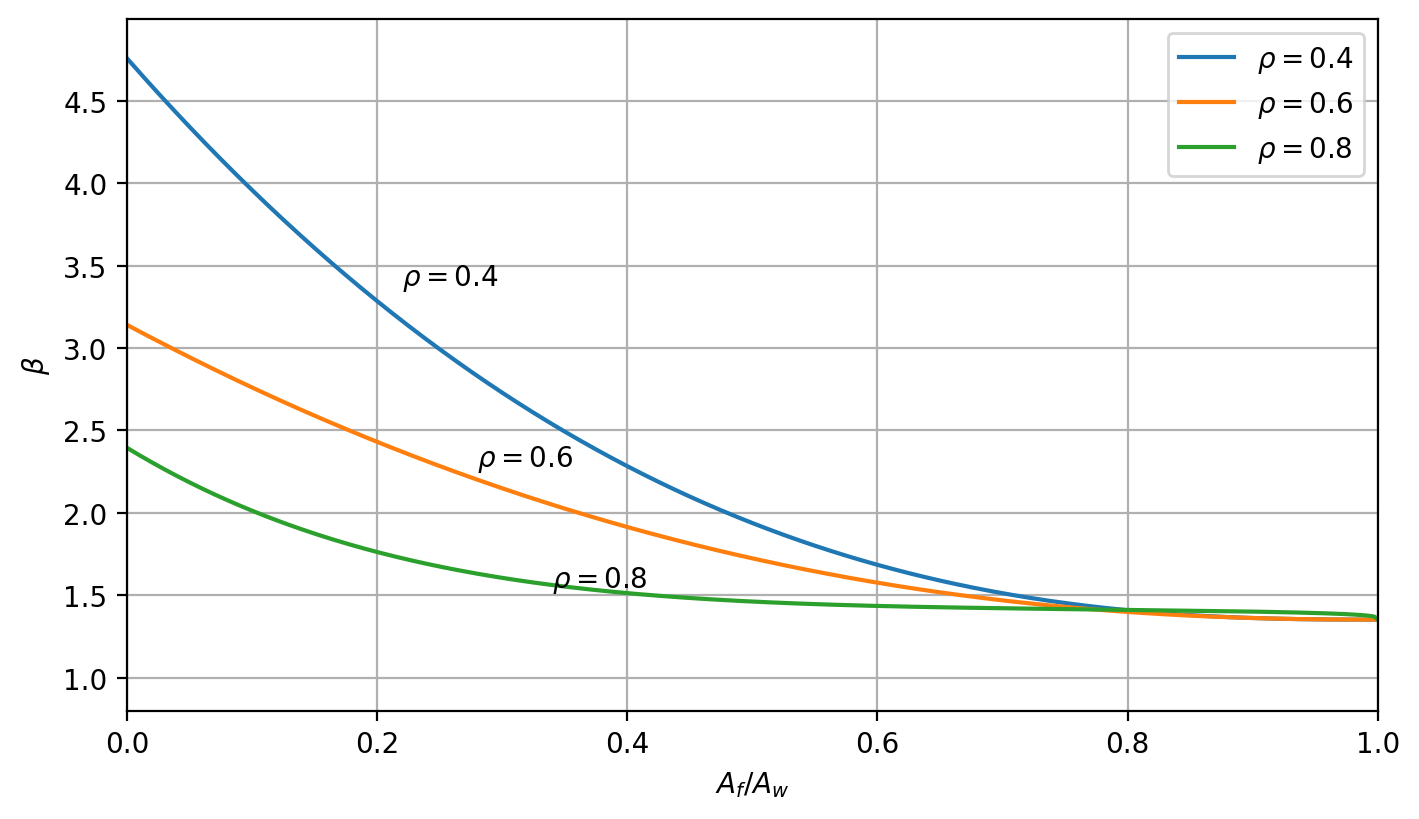

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C0 = 1.352128

def beta_rho_04(x):
    return C0 + 3.405851 * (1.0 - x) ** 2.539312

def beta_rho_06(x):
    return C0 + 1.788404 * (1.0 - x) ** 2.266723

def beta_rho_08(x):
    return C0 + 0.092561 * (1.0 - x) ** 0.278608 + 0.950114 * (1.0 - x) ** 4.832105

x = np.linspace(0.0, 1.0, 401)
b04, b06, b08 = beta_rho_04(x), beta_rho_06(x), beta_rho_08(x)

plt.figure(figsize=(7.2, 4.2), dpi=200)
plt.plot(x, b04, label=r"$\rho=0.4$")
plt.plot(x, b06, label=r"$\rho=0.6$")
plt.plot(x, b08, label=r"$\rho=0.8$")

plt.xlabel(r"$A_f/A_w$")
plt.ylabel(r"$\beta$")
plt.xlim(0, 1)
plt.ylim(0.8, max(b04.max(), b06.max(), b08.max()) * 1.05)
plt.grid(True)

def annotate_on_curve(x0, y_arr, text, dx=0.02, dy=0.05):
    i = np.argmin(np.abs(x - x0))
    plt.text(x[i] + dx, y_arr[i] + dy, text)

annotate_on_curve(0.20, b04, r"$\rho=0.4$", dy=0.10)
annotate_on_curve(0.26, b06, r"$\rho=0.6$", dy=0.03)
annotate_on_curve(0.32, b08, r"$\rho=0.8$", dy=-0.03)

plt.legend(loc="upper right", frameon=True)
plt.tight_layout()
plt.show()
